In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
print("Upload image of First Group Member: ")
uploaded_A = files.upload()

print("Upload image of Second Group Member: ")
uploaded_B = files.upload()

Upload image of First Group Member: 


Saving Img 1.png to Img 1.png
Upload image of Second Group Member: 


Saving Img 2.JPG to Img 2.JPG


In [ ]:
image_A_path = list(uploaded_A.keys())[0]
image_B_path = list(uploaded_B.keys())[0]

image_A = cv2.imread(image_A_path, cv2.IMREAD_GRAYSCALE)
image_B = cv2.imread(image_B_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
height, width = 500, 500
image_A_resized = cv2.resize(image_A, (width, height))
image_B_resized = cv2.resize(image_B, (width, height))


In [ ]:
low_pass = cv2.GaussianBlur(image_A_resized, (25, 25), sigmaX=15)

In [ ]:
blurred_B = cv2.GaussianBlur(image_B_resized, (25, 25), sigmaX=15)
high_pass = cv2.subtract(image_B_resized, blurred_B)

In [ ]:
hybrid_image = cv2.addWeighted(low_pass, 0.6, high_pass, 0.4, 0)

In [ ]:
def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


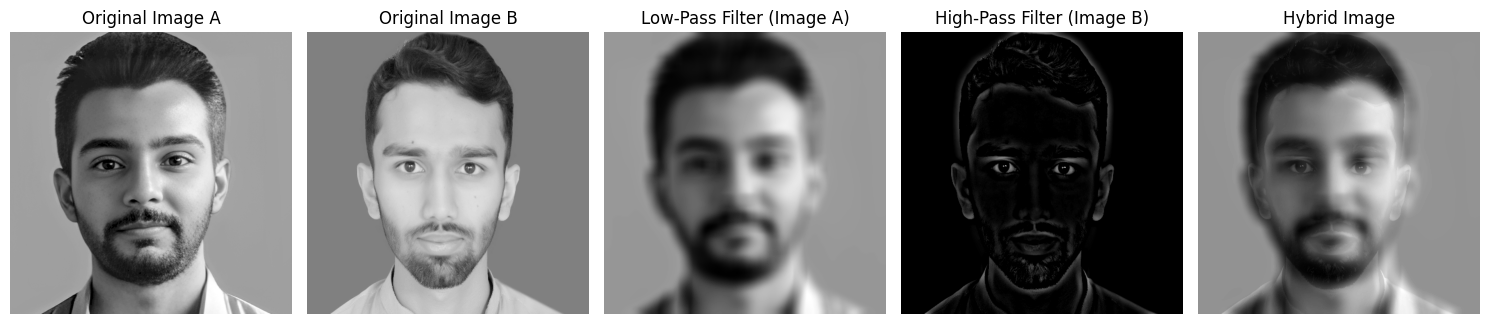

In [ ]:
titles = ['Original Image A', 'Original Image B', 'Low-Pass Filter (Image A)',
          'High-Pass Filter (Image B)', 'Hybrid Image']
images = [image_A_resized, image_B_resized, low_pass, high_pass, hybrid_image]
display_images(images, titles)